In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
df = pd.read_csv("../../data/Dataset.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [95]:
df.drop(["CUST_ID"],axis=1, inplace=True)

## MISSING VALUES

In [98]:
df["MINIMUM_PAYMENTS"] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df["CREDIT_LIMIT"] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

df.to_csv("../../data/dataset_cleaned.csv", index=False)  # Will need this dataset later for comparison

## Ratio and aggregate features

In [84]:
df['CREDIT_UTILIZATION'] = df['BALANCE'] / df['CREDIT_LIMIT']

df['TOTAL_TRX'] = df['PURCHASES_TRX'] + df['CASH_ADVANCE_TRX']
df['TOTAL_PURCHASE_FREQUENCY'] = df['PURCHASES_FREQUENCY'] + df['ONEOFF_PURCHASES_FREQUENCY'] + df['PURCHASES_INSTALLMENTS_FREQUENCY']
df['AVG_PAYMENT'] = df['PAYMENTS'] / df['TENURE']


## Features based on behaviour

In [85]:
# High credit utilizers
df['HIGH_CREDIT_UTILIZER'] = df['CREDIT_UTILIZATION'].apply(lambda x: 1 if x > 0.75 else 0)

# Full payments
df['FULL_PAYMENT_FLAG'] = df['PRC_FULL_PAYMENT'].apply(lambda x: 1 if x == 1 else 0)


## Time Based features

In [86]:
df['BALANCE_PER_MONTH'] = df['BALANCE'] / df['TENURE']
df['PURCHASES_PER_MONTH'] = df['PURCHASES'] / df['TENURE']
df['PAYMENTS_PER_MONTH'] = df['PAYMENTS'] / df['TENURE']

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 26 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [88]:
df_custom = df.iloc[: ,16:]
df_custom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TENURE                    8950 non-null   int64  
 1   CREDIT_UTILIZATION        8950 non-null   float64
 2   TOTAL_TRX                 8950 non-null   int64  
 3   TOTAL_PURCHASE_FREQUENCY  8950 non-null   float64
 4   AVG_PAYMENT               8950 non-null   float64
 5   HIGH_CREDIT_UTILIZER      8950 non-null   int64  
 6   FULL_PAYMENT_FLAG         8950 non-null   int64  
 7   BALANCE_PER_MONTH         8950 non-null   float64
 8   PURCHASES_PER_MONTH       8950 non-null   float64
 9   PAYMENTS_PER_MONTH        8950 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 699.3 KB


In [89]:
df_custom
df_custom.to_csv('../../data/custom_features.csv', index=False)

In [92]:
df_og = pd.read_csv("../../data/Dataset.csv")
df_og.drop(["CUST_ID","TENURE"],axis=1, inplace=True)

df_cus_og = pd.concat([df_og, df_custom],axis=1)
df_cus_og

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,TENURE,CREDIT_UTILIZATION,TOTAL_TRX,TOTAL_PURCHASE_FREQUENCY,AVG_PAYMENT,HIGH_CREDIT_UTILIZER,FULL_PAYMENT_FLAG,BALANCE_PER_MONTH,PURCHASES_PER_MONTH,PAYMENTS_PER_MONTH
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,...,12,0.040901,2,0.250000,16.816840,0,0,3.408396,7.950000,16.816840
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,...,12,0.457495,4,0.000000,341.919383,0,0,266.872285,0.000000,341.919383
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,...,12,0.332687,12,2.000000,51.838895,0,0,207.929072,64.430833,51.838895
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,...,12,0.222223,2,0.166666,0.000000,0,0,138.889212,124.916667,0.000000
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,...,12,0.681429,1,0.166666,56.527897,0,0,68.142861,1.333333,56.527897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,0.028494,6,1.833333,54.265744,0,0,4.748920,48.520000,54.265744
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,...,6,0.019183,6,1.833333,45.976887,0,0,3.197202,50.000000,45.976887
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,...,6,0.023399,5,1.500000,13.545129,0,0,3.899779,24.066667,13.545129
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,...,6,0.026915,2,0.000000,8.758327,0,0,2.242927,0.000000,8.758327


## Outlier detection

In [29]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("../../data/custom_features2.csv")

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)


In [30]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()  # Empty DataFrame to store outliers
    for col in df.select_dtypes(include=['float64', 'int64']).columns:  # Only apply to numerical columns
        Q1 = df[col].quantile(0.25)  # 25th percentile (Q1)
        Q3 = df[col].quantile(0.75)  # 75th percentile (Q3)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers in the current column
        outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        # Concatenate outliers into the outliers DataFrame
        outliers = pd.concat([outliers, outliers_in_col])
    
    # Drop duplicate rows if any
    return outliers.drop_duplicates()

# Call the function and get outliers
outliers_iqr = detect_outliers_iqr(df)
print(f"Number of outliers detected using IQR: {outliers_iqr.shape[0]}")


Number of outliers detected using IQR: 4760


In [31]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.05, random_state=42) 
outlier_pred = isolation_forest.fit_predict(df_scaled)

df['outlier'] = [1 if x == -1 else 0 for x in outlier_pred]


print(df[['outlier']].value_counts())

outlier
0          8502
1           448
Name: count, dtype: int64


In [32]:
df.to_csv("../../data/dataset_outliers.csv", index=False)
df

,TENURE,CREDIT_UTILIZATION,TOTAL_TRX,TOTAL_PURCHASE_FREQUENCY,HIGH_CREDIT_UTILIZER,FULL_PAYMENT_FLAG,BALANCE_PER_MONTH,PURCHASES_PER_MONTH,PAYMENTS_PER_MONTH,outlier
0,12,0.040901,2,0.250000,0,0,3.408396,7.950000,16.816840,0
1,12,0.457495,4,0.000000,0,0,266.872285,0.000000,341.919383,0
2,12,0.332687,12,2.000000,0,0,207.929072,64.430833,51.838895,0
3,12,0.222223,2,0.166666,0,0,138.889212,124.916667,0.000000,0
4,12,0.681429,1,0.166666,0,0,68.142861,1.333333,56.527897,0
...,...,...,...,...,...,...,...,...,...,...
8945,6,0.028494,6,1.833333,0,0,4.748920,48.520000,54.265744,0
8946,6,0.019183,6,1.833333,0,0,3.197202,50.000000,45.976887,0
8947,6,0.023399,5,1.500000,0,0,3.899779,24.066667,13.545129,0
8948,6,0.026915,2,0.000000,0,0,2.242927,0.000000,8.758327,0


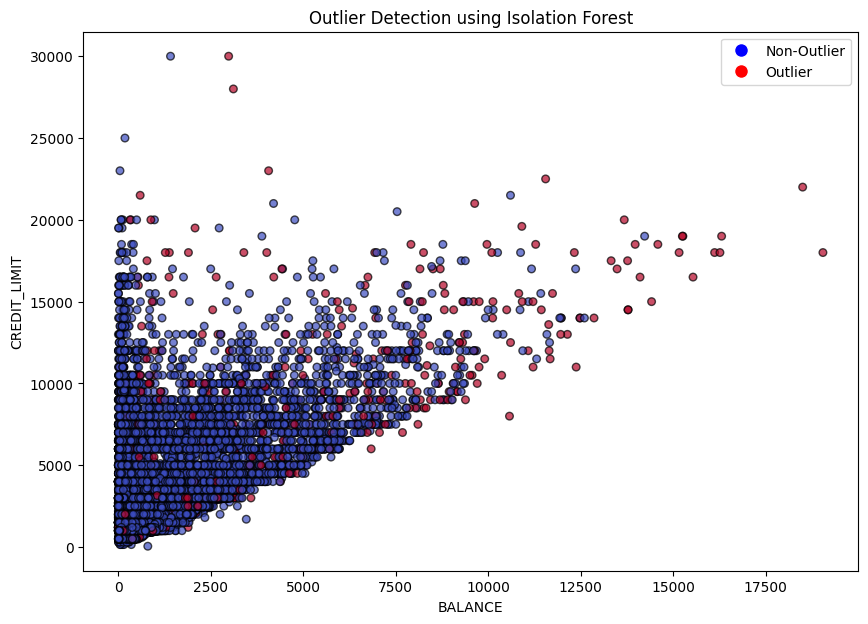

In [35]:
df2 = pd.read_csv("../../data/dataset_cleaned.csv")
df2['outlier'] = df["outlier"]

x_feature = 'BALANCE'
y_feature = 'CREDIT_LIMIT'

# Plot the data points, coloring the outliers differently
plt.figure(figsize=(10, 7))
plt.scatter(df2[x_feature], df2[y_feature], c=df2['outlier'], cmap='coolwarm', s=30, edgecolor='k', alpha=0.7)

# Add plot details
plt.title('Outlier Detection using Isolation Forest')
plt.xlabel(x_feature)
plt.ylabel(y_feature)

# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Non-Outlier'),
           plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Outlier')]
plt.legend(handles=handles)

plt.show()
